In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

In [2]:
dtypes_auc = { "auction_type_id": np.float16, "country": "category", "platform": "category", "ref_type_id": "category", 
               "source_id": "category", "device_id": "category"}

In [3]:
auctions = pd.read_csv('data/auctions.csv.gzip', compression = 'gzip', low_memory = False, dtype=dtypes_auc)

In [4]:
auctions['date'] = pd.to_datetime(auctions['date'])

## **Analisis inicial**

In [5]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [6]:
len(auctions)

19571319

In [7]:
auctions['auction_type_id'].isnull().sum()
# Auction Type ID es todo Null #

19571319

## 1 - Cantidad auctions por dia de los 5 devices mas populares

In [8]:
auctions['device_id'].value_counts().head(5)

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

In [9]:
#Quiero tener algun tipo de indice para no hardcodear los valores de los id's
top5 = auctions.groupby('device_id').agg({'device_id': 'count'})

In [10]:
top5.columns = ['count']

In [11]:
top5 = top5.sort_values('count', ascending = False).head(5)

In [12]:
top5.reset_index(inplace = True)

In [13]:
top5

,device_id,count
0,633139769114048761,27762
1,7202276635029175071,23055
2,7298861376107043945,18188
3,6302840482782120473,16400
4,5376802567578262905,16367


In [14]:
auctions['day'] = auctions['date'].dt.day

In [15]:
auctions_graficable = auctions.loc[(auctions['device_id'] == top5.loc[0,'device_id']) | (auctions['device_id'] == top5.loc[1,'device_id']) | \
             (auctions['device_id'] == top5.loc[2,'device_id']) | (auctions['device_id'] == top5.loc[3,'device_id']) | \
             (auctions['device_id'] == top5.loc[4,'device_id']) ]\
        .groupby('day').agg({'day' : 'count'})

In [16]:
auctions_graficable.columns = ['count']

In [17]:
auctions_graficable.reset_index(inplace = True)

In [18]:
auctions_graficable.head()

,day,count
0,5,3896
1,6,2136
2,7,9370
3,8,11177
4,9,11422


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


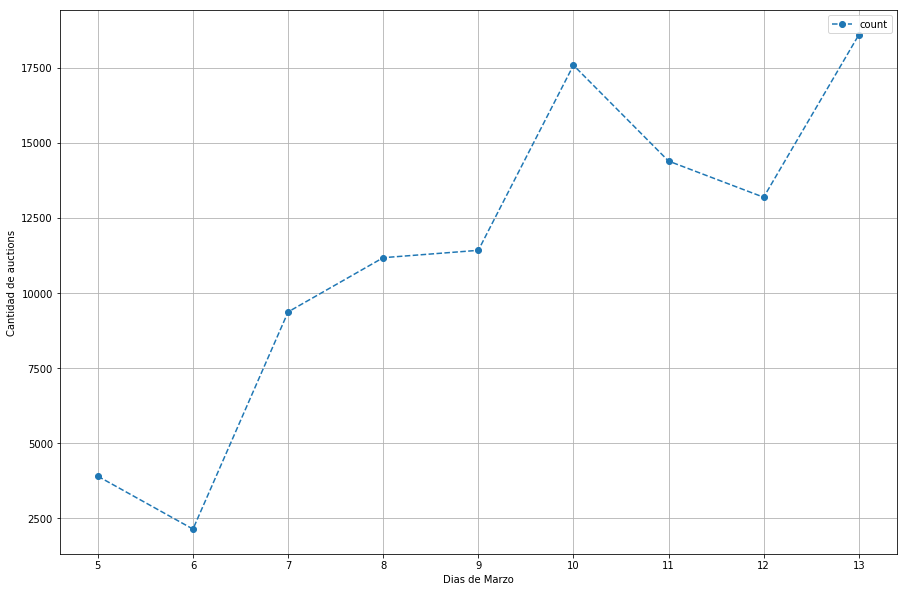

In [19]:
grph1 = auctions_graficable.plot.line('day', 'count', grid = 'on', figsize = (15,10), style = 'o--')
grph1.set_xlabel('Dias de Marzo')
grph1.set_ylabel('Cantidad de auctions');

## 2 - Cantidad de auctions por source

In [20]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [21]:
auctions_source = auctions.groupby('source_id').agg({'source_id' : 'count'})

In [22]:
auctions_source.columns = ['count']

In [23]:
auctions_source.reset_index(inplace = True)

In [24]:
auctions_source = auctions_source.sort_values('count', ascending = False)

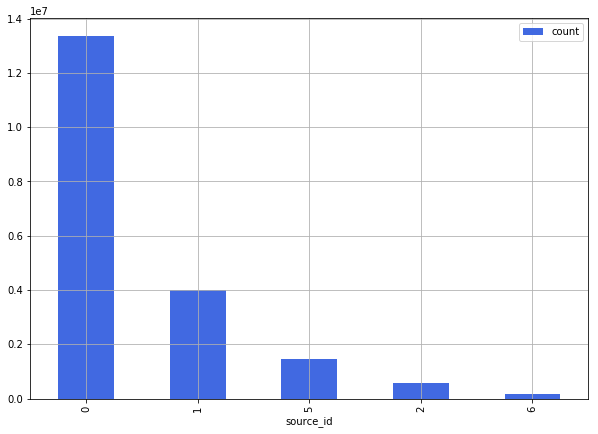

In [25]:
grph3 = auctions_source.plot.bar('source_id', 'count', grid = True, figsize = (10,7), color = 'royalblue')

## 3-Cantidad de auctions segun la hora de cada dia

Se quiere saber cual es la hora donde suceden mas subastas

In [27]:
auctions['hour'] = auctions['date'].dt.hour

In [28]:
tiempo = auctions[['hour', 'day']]

In [36]:
tiempo.head()

,hour,day
0,14,11
1,14,11
2,14,11
3,14,11
4,14,11


In [57]:
tiempo_graf = tiempo.groupby(['day', 'hour']).agg({'hour' : 'count'})
tiempo_graf = tiempo_graf.rename(columns = {'hour':'auction_count'})

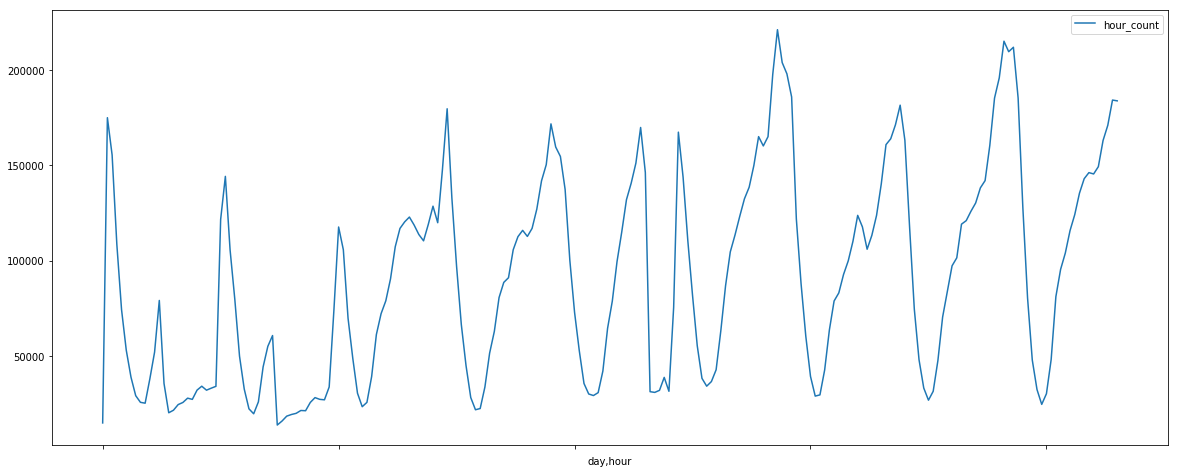

In [56]:
plot = tiempo_graf.plot(figsize=(20,8))

# Medio feo, arreglar :c